# Introducción a Python y NLP

En este *notebook*, desarrollo los ejercicios del libro *Natural Languaje Processing with Python*. Para esto, hay que importar el paquete principal **nltk** y sus dataframes asociados.

In [2]:
%%capture
import nltk 
nltk.download("book")
from nltk.book import *


In [3]:
texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Análisis básicos en NLP

Como es clásico, la búsqueda de concordancia nos permite explorar superficialmente de qué va un texto. Las concordancias pueden mostrarse a través del método `.concordance("word")`:

In [4]:
text2.concordance("love")

Displaying 25 of 77 matches:
priety of going , and her own tender love for all her three children determine
es ." " I believe you are right , my love ; it will be better that there shoul
 . It implies everything amiable . I love him already ." " I think you will li
sentiment of approbation inferior to love ." " You may esteem him ." " I have 
n what it was to separate esteem and love ." Mrs . Dashwood now took pains to 
oner did she perceive any symptom of love in his behaviour to Elinor , than sh
 how shall we do without her ?" " My love , it will be scarcely a separation .
ise . Edward is very amiable , and I love him tenderly . But yet -- he is not 
ll never see a man whom I can really love . I require so much ! He must have a
ry possible charm ." " Remember , my love , that you are not seventeen . It is
f I do not now . When you tell me to love him as a brother , I shall no more s
hat Colonel Brandon was very much in love with Marianne Dashwood . She rather 
e were ever animated en

Expresiones que ocupan un contexto similar (como "amor" en el caso anterior) pueden evidenciarse con el método `.similar("word")`. En el ejemplo siguiente, vemos palabras que ocupan regularmente el mismo contexto que *amor* en Orgullo y Prejuicio:

In [5]:
text2.similar("love")

affection sister heart mother time see town life it dear elinor
marianne me word family her him do regard head


Si hacemos lo mismo con Moby Dick, vemos que el "love" ocupa las mismas posiciones que *mar, vida, muerte, naturaleza, hombre, barco*, mientras que en Orgullo y Prejuicio esto se reserva en el *afecto*, el pueblo, la familia. Esto es interesante en tanto es un reflejo del efecto del **campo** en la combinatoria:

In [6]:
text1.similar("love")

sea man it ship by him hand them whale view ships land me life death
water way head nature fear


Un clásico también son los *dispersion plots*. Con este, se puede visualizar la instanciación de lexemas en un texto completo, tal como en los discursos presidenciales estadounidenses y en Orgullo y Prejuicio:

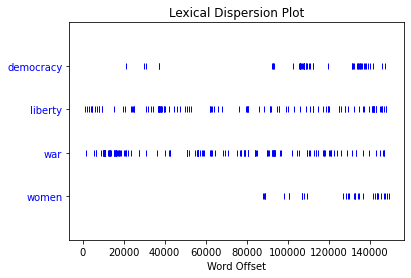

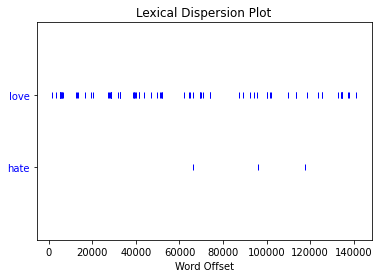

In [7]:
text4.dispersion_plot(["democracy", "liberty", "war", "women"])
text2.dispersion_plot(["love", "hate"])

Otro manejo básico de los textos es conocer su cantidad de **tokens** (casos) y **types** (tipos), así como las medidas de **riqueza léxica**. Así, mientras los tokens representan la cantidad de ocurrencias de un ítem, los types representan el valor único de cada ítem independiente de su número de aparición. 



In [8]:
print("Orgullo y Prejuicio posee un total de ", len(text2), "tokens")
print("Orgullo y Prejuicio posee un total de ", len(set(text2)), "types")

Orgullo y Prejuicio posee un total de  141576 tokens
Orgullo y Prejuicio posee un total de  6833 types


A partir de estas medidas se obtiene la diversidad léxica, tal que
$ riqueza = \frac{token}{type}$. Entonces, a partir de esta ecuación, podemos decir que :

In [9]:
print("Cada palabra en Orgullo y Prejuicio se ocupa en promedio unas", len(text2)/len(set(text2)))

Cada palabra en Orgullo y Prejuicio se ocupa en promedio unas 20.719449729255086


Medidas como la diversidad léxica y el cálculo de porcentajes pueden operacionalizarse rápidamente en **funciones** con el operador `def`:

In [10]:
def diversidad_lexica(text):
  return len(text)/len(set(text))

def porcentaje(count, total):
  return 100 * count/total

Con estas funciones ya definidas, podemos ocuparlas con cualquier texto. 

In [11]:
print("Moby Dick posee una diversidad léxica de", diversidad_lexica(text1))

Moby Dick posee una diversidad léxica de 13.502044830977896


In [12]:
print("La palabra `love` representa un", porcentaje(text1.count("love"), len(text1)), "de Orgullo y Prejuicio")

La palabra `love` representa un 0.009201783612390201 de Orgullo y Prejuicio


Desde un punto de vista computacional, los textos son una lista de palabras y símbolos de puntuación. Con esta visión, un token posee una posición conocida como **index** (en Python los index parten en 0, en R parten en 1). El index puede ser recuperado desde una palabra o con un número:

In [13]:
print("La palabra `love` se encuentra en el index", text2.index("love"))
print(text2[1447])

La palabra `love` se encuentra en el index 1447
love


## Frecuencias

Estadísticamente, también podemos observar la distribución de frecuencia de los diferentes textos. Para esto, ocupamos la función `FreqDist()`:

In [14]:
fdist2 = FreqDist(text2)
vocabulario2 = fdist2.keys()
print("La palabra `love` posee una frecuencia de", fdist2["love"])

La palabra `love` posee una frecuencia de 77


Podemos graficar esta distribución con el método `plot(n, cumulative)` sobre el objeto `fdist2`. No obstante, muchas de las palabras que recupera son poco informativas, como determinantes o puntuaciones:



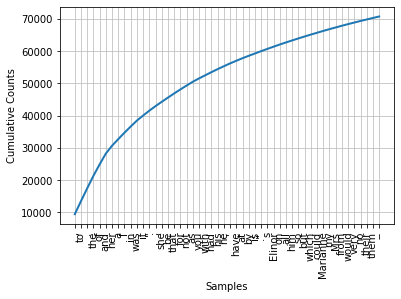

In [15]:
fdist2.plot(50, cumulative = True)

Por medio de un condicional como `[w for w in V if len(w) > 4]` logramos que se seleccionen solo palabras con una extensión mayor a 4 caracteres. 

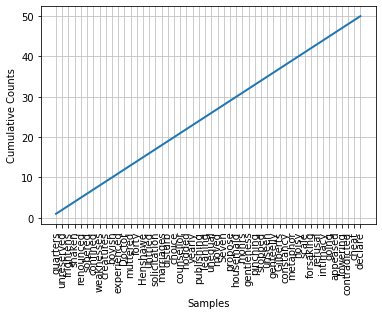

In [16]:
V = set(text2)
long_words = [w for w in V if len(w) > 4]
fdist_long = FreqDist(long_words)
fdist_long.plot(50, cumulative = True)

## Colocaciones y bigramas

Las colocaciones son conjuntos de palabras que suelen ocurrir juntas (como *vino tinto*). La observaciones de estos implican la revisión de bigramas. Así, toda colocación es un n-grama, pero no todo n-grama es una colocación. El método `.collocations()` expone estos bigramas:

In [17]:
text2.collocations()

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


Lo interesante de las colocaciones es que muestran patrones léxicogramaticales propios de cada género o tipo de texto. En el caso anterior de Orgullo y Prejuicio, las colocaciones suelen ser nombres (e.g. *colonel Brandon*), periodos de tiempo (e.g. *every day*) y lugares (e.g. *Berkeley Street*).

In [18]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


Con estos recursos, entonces, es posible construir condicionales en una única línea de código que recupere los ítemes que sean `True` según condicionales:

In [19]:
sorted([w for w in set(text7) if '-' in w and 'index' in w])
sorted([t for t in set(text2) if 'cie' in t or 'cei' in t])
sorted([amor for amor in set(text2) if 'love' in amor])
sorted([año for año in set(text2) if año.isdigit() and len(año) >= 4])
len(set([word.lower() for word in text1 if word.isalpha()]))

16948

Además, Python permite hacer un `loop` en el texto:


In [20]:
tricky = sorted([w for w in set(text2) if 'cie' in w or 'cei' in w])
for word in tricky:
  print(word)

ancient
ceiling
conceit
conceited
conceive
conscience
conscientious
conscientiously
deceitful
deceive
deceived
deceiving
deficiencies
deficiency
deficient
delicacies
excellencies
fancied
insufficiency
insufficient
legacies
perceive
perceived
perceiving
prescience
prophecies
receipt
receive
received
receiving
society
species
sufficient
sufficiently
undeceive
undeceiving


## Ejercicios

1. Produce a dispersion plot of the four main protagonists in Sense and Sensibility: Elinor, Marianne, Edward, and Willoughby. What can you observe about the different roles played by the males and females in this novel? Can you identify the couples? 

**R::** Pareciera que las mujeres siempre están presentes en la obra, mientras que los hombres van intercalando su presencia. Es decir, cuando Edward es mencionado, Willoughby no lo es. En otras palabras, las mujeres articulan la historia y el diálogo. En cuanto a las parejas, creo que Edward se queda con Elinor, en tanto ambos dialogan mucho al final. Por su parte, Marianne y Willoughby no parecen seguir juntos.

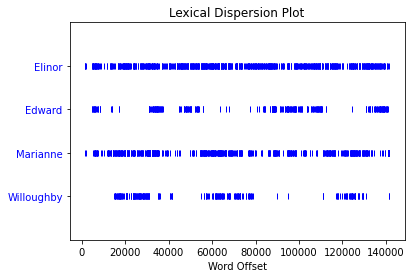

In [21]:
text2.dispersion_plot(["Elinor", "Edward", "Marianne", "Willoughby"])

2. Find the collocations in text5.

In [23]:
text5.collocations()

wanna chat; PART JOIN; MODE #14-19teens; JOIN PART; PART PART;
cute.-ass MP3; MP3 player; JOIN JOIN; times .. .; ACTION watches; guys
wanna; song lasts; last night; ACTION sits; -...)...- S.M.R.; Lime
Player; Player 12%; dont know; lez gurls; long time


3. Use `text9.index()` to find the index of the word sunset. You’ll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.

In [24]:
print("El item `sunset` se encuentra en el index", text9.index("sunset"))
text9[621:644]

El item `sunset` se encuentra en el index 629


['THE',
 'suburb',
 'of',
 'Saffron',
 'Park',
 'lay',
 'on',
 'the',
 'sunset',
 'side',
 'of',
 'London',
 ',',
 'as',
 'red',
 'and',
 'ragged',
 'as',
 'a',
 'cloud',
 'of',
 'sunset',
 '.']

4. Using list addition, and the set and sorted operations, compute the vocabulary of the sentences sent1 ... sent8.

In [25]:
sent_total = sent1 + sent2 + sent3 + sent4 + sent5 + sent6 + sent7 + sent8
print("El total de oraciones 1...8 posee un total de tipos de", len(sorted(set(sent_total))))

El total de oraciones 1...8 posee un total de tipos de 75


5. What is the difference between the following two lines? Which one will give a larger value? Will this be the case for other texts?

In [26]:
len(sorted(set([w.lower() for w in text1]))) # 17231
len(sorted([w.lower() for w in set(text1)])) # 19317

19317

6. Write the slice expression that extracts the last two words of text2.

In [27]:
text2[-2:]

['THE', 'END']

7. Find all the four-letter words in the Chat Corpus (text5). With the help of a frequency distribution (FreqDist), show these words in decreasing order of fre- quency.

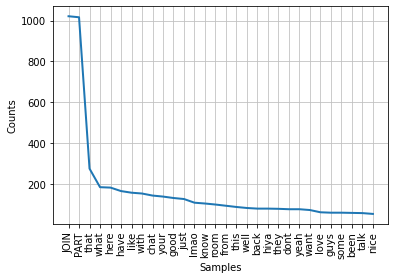

In [28]:
four_letter = [f for f in text5 if len(f) == 4 and f.isalpha()]
freqfour = FreqDist(four_letter)
freqfour.plot(30, cumulative = False)

8. Review the discussion of looping with conditions in Section 1.4. Use a combination of for and if statements to loop over the words of the movie script for Monty Python and the Holy Grail (text6) and print all the uppercase words, one per line.

In [ ]:
for up in set(text6):
  if up.isupper():
    print(up)

9. Write expressions for finding all words in text6 that meet the following conditions:


1.   Ending in ize
2.   Containing the letter z
3.   Containing the sequence of letters pt
4.   All lowercase letters except for an initial capital (i.e., titlecase)



In [71]:
%%capture
z = sorted([w for w in set(text6) if 'z' in w])
ize = sorted([w for w in set(text6) if w.endswith("ize")])
pt = sorted([w for w in set(text6) if 'pt' in w])
title = sorted([w for w in set(text6) if w.istitle()])

8. **Define sent to be the list of words ['she', 'sells', 'sea', 'shells', 'by', 'the', 'sea', 'shore']. Now write code to perform the following tasks:**


1. Print all words beginning with sh.
2. Print all words longer than four characters

In [46]:
sent =  ['she', 'sells', 'sea', 'shells', 'by', 'the', 'sea', 'shore']
sh = sorted([w for w in sent if w.startswith("sh")])
longer_than_four = sorted([f for f in sent if len(f) > 4])
print("Las palabras que empiezan con `sh` son", sh)
print("Las palabras mayores a cuatro letras son", longer_than_four)

Las palabras que empiezan con `sh` son ['she', 'shells', 'shore']
Las palabras mayores a cuatro letras son ['sells', 'shells', 'shore']


9.**What does the following Python code do? sum([len(w) for w in text1]) Can you use it to work out the average word length of a text?**

Este código suma el largo total de las palabras en el text1

In [55]:
mean_word = sum([len(w) for w in text1])/len(text1)
print("El texto 1 posee un largo medio de palabra de", round(mean_word, 1))

El texto 1 posee un largo medio de palabra de 3.8


10. **Define a function called vocab_size(text) that has a single parameter for the text, and which returns the vocabulary size of the text.**

In [67]:
def vocab_size(text):
  types = len(set(text))
  token = len(text)
  richness = token/types
  return print("El texto posee un tamaño de vocabulario de", token, "tokens y", types, "types", "y una diversidad de", round(richness, 1))

vocab_size(text1)

El texto posee un tamaño de vocabulario de 260819 tokens y 19317 types y una diversidad de 13.5
